# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train = train['features'], train['labels']
X_valid_orig, y_valid = valid['features'], valid['labels']
X_test_orig, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_orig)

# TODO: Number of validation examples

n_validation = len(X_valid_orig)

# TODO: Number of testing examples.
n_test = len(X_test_orig)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_orig[0].shape

# TODO: How many unique classes/labels there are in the dataset.
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#print(X_train_orig)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Traffic sign class 0: Speed limit (20km/h)                                180 samples


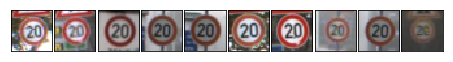

#####################################################################################

Traffic sign class 1: Speed limit (30km/h)                                1980 samples


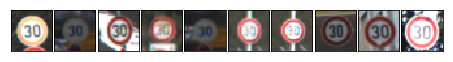

#####################################################################################

Traffic sign class 2: Speed limit (50km/h)                                2010 samples


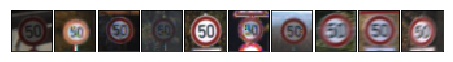

#####################################################################################

Traffic sign class 3: Speed limit (60km/h)                                1260 samples


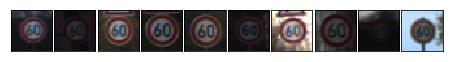

#####################################################################################

Traffic sign class 4: Speed limit (70km/h)                                1770 samples


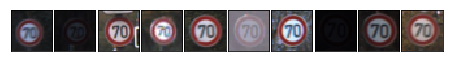

#####################################################################################

Traffic sign class 5: Speed limit (80km/h)                                1650 samples


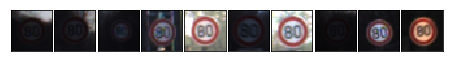

#####################################################################################

Traffic sign class 6: End of speed limit (80km/h)                         360 samples


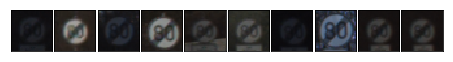

#####################################################################################

Traffic sign class 7: Speed limit (100km/h)                               1290 samples


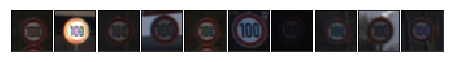

#####################################################################################

Traffic sign class 8: Speed limit (120km/h)                               1260 samples


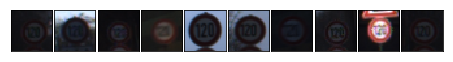

#####################################################################################

Traffic sign class 9: No passing                                          1320 samples


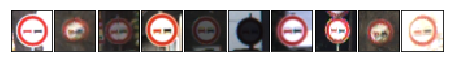

#####################################################################################

Traffic sign class 10: No passing for vehicles over 3.5 metric tons        1800 samples


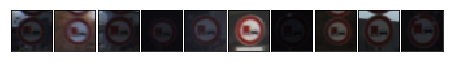

#####################################################################################

Traffic sign class 11: Right-of-way at the next intersection               1170 samples


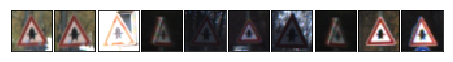

#####################################################################################

Traffic sign class 12: Priority road                                       1890 samples


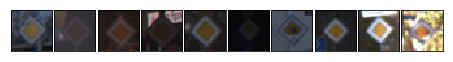

#####################################################################################

Traffic sign class 13: Yield                                               1920 samples


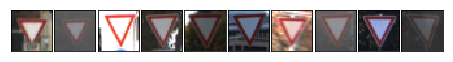

#####################################################################################

Traffic sign class 14: Stop                                                690 samples


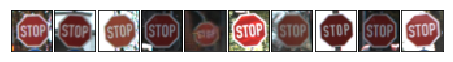

#####################################################################################

Traffic sign class 15: No vehicles                                         540 samples


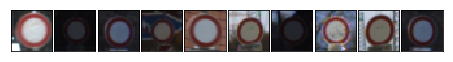

#####################################################################################

Traffic sign class 16: Vehicles over 3.5 metric tons prohibited            360 samples


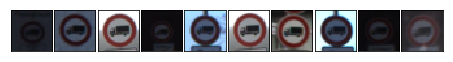

#####################################################################################

Traffic sign class 17: No entry                                            990 samples


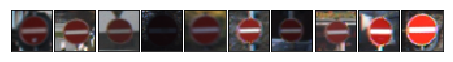

#####################################################################################

Traffic sign class 18: General caution                                     1080 samples


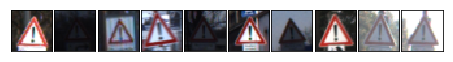

#####################################################################################

Traffic sign class 19: Dangerous curve to the left                         180 samples


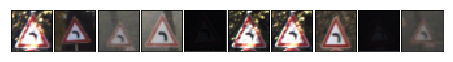

#####################################################################################

Traffic sign class 20: Dangerous curve to the right                        300 samples


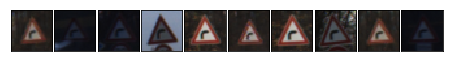

#####################################################################################

Traffic sign class 21: Double curve                                        270 samples


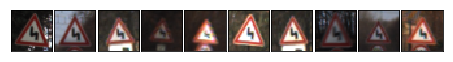

#####################################################################################

Traffic sign class 22: Bumpy road                                          330 samples


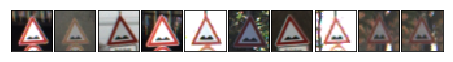

#####################################################################################

Traffic sign class 23: Slippery road                                       450 samples


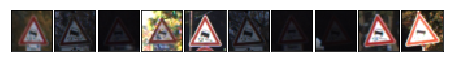

#####################################################################################

Traffic sign class 24: Road narrows on the right                           240 samples


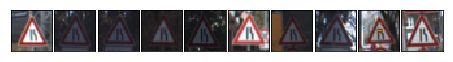

#####################################################################################

Traffic sign class 25: Road work                                           1350 samples


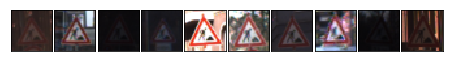

#####################################################################################

Traffic sign class 26: Traffic signals                                     540 samples


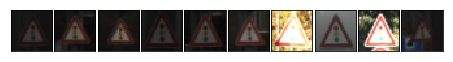

#####################################################################################

Traffic sign class 27: Pedestrians                                         210 samples


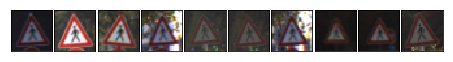

#####################################################################################

Traffic sign class 28: Children crossing                                   480 samples


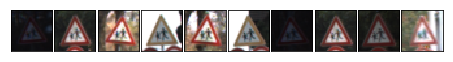

#####################################################################################

Traffic sign class 29: Bicycles crossing                                   240 samples


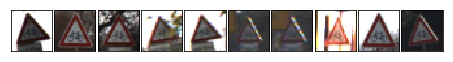

#####################################################################################

Traffic sign class 30: Beware of ice/snow                                  390 samples


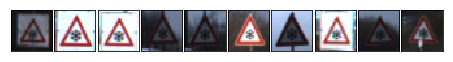

#####################################################################################

Traffic sign class 31: Wild animals crossing                               690 samples


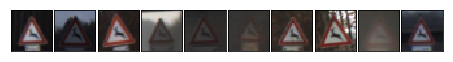

#####################################################################################

Traffic sign class 32: End of all speed and passing limits                 210 samples


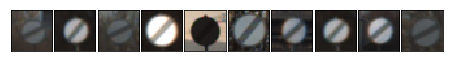

#####################################################################################

Traffic sign class 33: Turn right ahead                                    599 samples


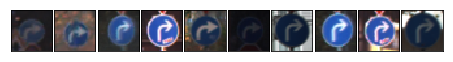

#####################################################################################

Traffic sign class 34: Turn left ahead                                     360 samples


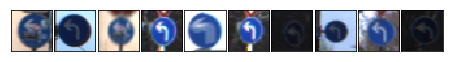

#####################################################################################

Traffic sign class 35: Ahead only                                          1080 samples


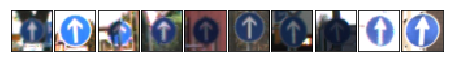

#####################################################################################

Traffic sign class 36: Go straight or right                                330 samples


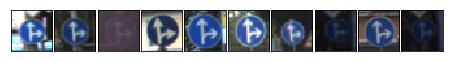

#####################################################################################

Traffic sign class 37: Go straight or left                                 180 samples


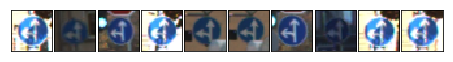

#####################################################################################

Traffic sign class 38: Keep right                                          1860 samples


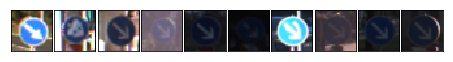

#####################################################################################

Traffic sign class 39: Keep left                                           270 samples


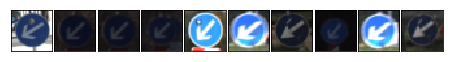

#####################################################################################

Traffic sign class 40: Roundabout mandatory                                300 samples


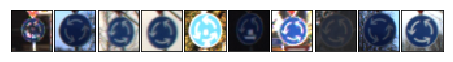

#####################################################################################

Traffic sign class 41: End of no passing                                   210 samples


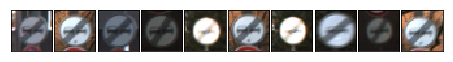

#####################################################################################

Traffic sign class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


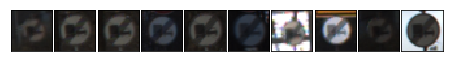

#####################################################################################



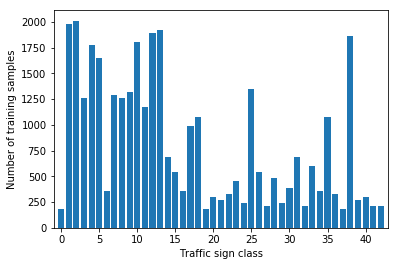

In [10]:
import random
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Traffic sign class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train_orig[random_indices[i]])
    plt.show()
    print("#####################################################################################\n")
    
plt.bar( np.arange( 43 ), class_counts, align='center' )
plt.xlabel('Traffic sign class')
plt.ylabel('Number of training samples')
plt.xlim([-1, 43])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
def cnv2gray(image, size, shape):
    gray = np.empty([size, shape[0], shape[1]], dtype=image.dtype)
    for index in range(0, size):
        gray[index,:,:] = cv2.cvtColor(image[index,:,:,:], cv2.COLOR_BGR2GRAY)
    gray = gray[:,:,:,np.newaxis]
    return gray

def normalize(image_data):
    a = 0.1
    b = 0.9
    X_min = np.amin(image_data)
    #print(X_min)
    X_max = np.amax(image_data) 
    #print(X_max)
    image_data_scaled = np.add(a,np.divide(np.multiply(np.subtract(image_data,X_min),np.subtract(b,a)),np.subtract(X_max,X_min)))
    #image_data_scaled = np.divide(np.subtract(image_data,128),128)
    return image_data_scaled

X_train_gray = cnv2gray(X_train_orig,n_train,image_shape)
X_train = normalize(X_train_gray)

X_valid_gray = cnv2gray(X_valid_orig,n_validation,image_shape)
X_valid = normalize(X_valid_gray)

X_test_gray = cnv2gray(X_test_orig,n_test,image_shape)
X_test = normalize(X_test_gray)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape) 

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### Model Architecture

### Shuffling the training data

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Setup Tensorflow

In [29]:
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 128

### Model Architecture

In [30]:
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
                'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 6],mu,sigma)),
                'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16],mu,sigma)),
                'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120],mu,sigma)),
                'wd2': tf.Variable(tf.truncated_normal([120, 84],mu,sigma)),
                'out': tf.Variable(tf.truncated_normal([84, 43],mu,sigma))}

    biases = {
                'bc1': tf.Variable(tf.truncated_normal([6],mu,sigma)),
                'bc2': tf.Variable(tf.truncated_normal([16],mu,sigma)),
                'bd1': tf.Variable(tf.truncated_normal([120],mu,sigma)),
                'bd2': tf.Variable(tf.truncated_normal([84],mu,sigma)),
                'out': tf.Variable(tf.truncated_normal([43],mu,sigma))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #flat = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    flat = flatten(conv2)
    print(flat)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(flat, weights['wd1']), biases['bd1'])
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Features and Labels

In [31]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Training pipeline

In [32]:
rate = 0.001

logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("Flatten_1/Reshape:0", shape=(?, 400), dtype=float32)


### Model evaluation

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training the model

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(sess, ".\data.ckpt")
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.581

EPOCH 2 ...
Validation Accuracy = 0.769

EPOCH 3 ...
Validation Accuracy = 0.801

EPOCH 4 ...
Validation Accuracy = 0.843

EPOCH 5 ...
Validation Accuracy = 0.868

EPOCH 6 ...
Validation Accuracy = 0.863

EPOCH 7 ...
Validation Accuracy = 0.887

EPOCH 8 ...
Validation Accuracy = 0.895

EPOCH 9 ...
Validation Accuracy = 0.892

EPOCH 10 ...
Validation Accuracy = 0.898

EPOCH 11 ...
Validation Accuracy = 0.904

EPOCH 12 ...
Validation Accuracy = 0.917

EPOCH 13 ...
Validation Accuracy = 0.910

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.928

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 17 ...
Validation Accuracy = 0.921

EPOCH 18 ...
Validation Accuracy = 0.923

EPOCH 19 ...
Validation Accuracy = 0.916

EPOCH 20 ...
Validation Accuracy = 0.926

EPOCH 21 ...
Validation Accuracy = 0.930

EPOCH 22 ...
Validation Accuracy = 0.928

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 24 ...
Validation Accura

### Evaluate the model

In [35]:
with tf.Session() as sess:
    saver.restore(sess, '.\data.ckpt')

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\data.ckpt
Train Accuracy = 0.994
Test Accuracy = 0.914


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

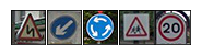

Image size:  (5, 32, 32, 3)


In [36]:
from skimage import io
title=[]
title.append("Class 21: Double Curve")
title.append("Class 39: Keep left")
title.append("Class 40: Roudabout mandatory")
title.append("Class 28: Children crossing")
title.append("Class 0: Speed limit (20km/h)")

test_images = np.uint8(np.zeros((5,32,32,3)))
for i in range(1,6):
    try:
        image = io.imread('test_images/{}.jpg'.format(str(i)))
        image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
        test_images[i-1] = image
    except ValueError:
        print('cannot open', i)

test_image_data = test_images.reshape((-1, 32, 32, 3)).astype(np.float32)

fig = plt.figure(figsize = (5, 1))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for i in range(5):
    axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(test_images[i])
plt.show()

print("Image size: ", test_images.shape)

### Predict the Sign Type for Each Image and Analyze performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [37]:
# Pre-process the data
test_image_p = cnv2gray(test_image_data,5,[32,32,3])
test_image_p = normalize(test_image_p)

image_labels = np.array([21,39,40,28,0])
    
prediction = 0
predval = tf.argmax(logits, 1)
predval_Five = tf.nn.top_k(predval, 5) 
predsoftmax = tf.nn.softmax(logits) 
predsoftmax_Five = tf.nn.top_k(predsoftmax, 5) 
with tf.Session() as sess: 
    saver.restore(sess, ".\data.ckpt") 
    print('Model data restored') 
    solution, solution_Five = sess.run([predval, predsoftmax_Five], feed_dict={x: test_image_p, keep_prob: 1.})

    print('Top five softmax probabilities values: \n',solution_Five.values)
    print('Top five softmax probabilities indices: \n',solution_Five.indices)
    print('Correct prediction:',image_labels)
    print('Model prediction:',solution)
    
for i in range(5):
    if(solution[i] == image_labels[i]):
        prediction += 20
print("Total prediction accuracy = {0}%".format(prediction))

INFO:tensorflow:Restoring parameters from .\data.ckpt
Model data restored
Top five softmax probabilities values: 
 [[  5.90689123e-01   2.22391292e-01   5.97979799e-02   3.70004512e-02
    3.15682068e-02]
 [  1.00000000e+00   2.97594198e-08   6.59799992e-11   2.32450760e-14
    5.20964988e-15]
 [  9.68799710e-01   2.62578018e-02   4.53904038e-03   1.58545357e-04
    1.46708539e-04]
 [  8.41307402e-01   1.05100513e-01   4.56523150e-02   7.22891698e-03
    4.93545784e-04]
 [  9.94991720e-01   4.45093447e-03   3.29710165e-04   1.58268638e-04
    2.27702731e-05]]
Top five softmax probabilities indices: 
 [[21 31 24 29 25]
 [39 33 37  4 13]
 [40 12 13 38 26]
 [28 23 30 29 34]
 [ 1  2 40 11  0]]
Correct prediction: [21 39 40 28  0]
Model prediction: [21 39 40 28  1]
Total prediction accuracy = 80%
